### 数据集介绍

本实验使用波士顿房价预测数据集，共506条样本数据，每条样本包含了12种可能影响房价的因素和该类房屋价格的中位数，各字段含义如**表2.1**所示： 

<center>
  
| 字段名   | 类型 | 含义  |
| -------- | -------- | -------- | 
| CRIM	| float | 该镇的人均犯罪率 |
| ZN	| float |占地面积超过25,000平方呎的住宅用地比例|
| INDUS	| float |非零售商业用地比例|
| CHAS	| int   |是否邻近 Charles River 1=邻近；0=不邻近|
| NOX	| float |一氧化氮浓度  | 
| RM	| float |每栋房屋的平均客房数 |
| AGE	| float |1940年之前建成的自用单位比例 |
| DIS	| float |到波士顿5个就业中心的加权距离 |
| RAD	| int   |到径向公路的可达性指数 |
| TAX	| int   |全值财产税率  |
| PTRATIO|float | 学生与教师的比例 |
| LSTAT	| float |低收入人群占比 |
| MEDV	| float |同类房屋价格的中位数 |
  
  </center>
  <center>表2.1 波士顿房价字段含义</center>

In [4]:
import pandas as pd

data = pd.read_csv("boston_house_prices.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [5]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

**异常值处理**

通过箱线图直观的显示数据分布,并观测数据中的异常值.箱线图一般由五个统计值组成: 

1. 最大值
2. 上四分位
3. 中位数
4. 下四分位
5. 最小值

一般来说,观测到的数据大于最大估计值或者小于最小估计值则判断为异常值，其中 

*最大估计值 = 上四分位 + 1.5 * (上四分位 - 下四分位)*

*最小估计值 = 下四分位 - 1.5 * (上四分位 - 下四分位)*

In [6]:
list(data.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [11]:
data['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [10]:
data['ZN'].value_counts()

ZN
0.0      372
20.0      21
80.0      15
22.0      10
25.0      10
12.5      10
40.0       7
30.0       6
45.0       6
90.0       5
33.0       4
21.0       4
95.0       4
60.0       4
75.0       3
28.0       3
52.5       3
55.0       3
34.0       3
70.0       3
35.0       3
85.0       2
82.5       2
17.5       1
18.0       1
100.0      1
Name: count, dtype: int64

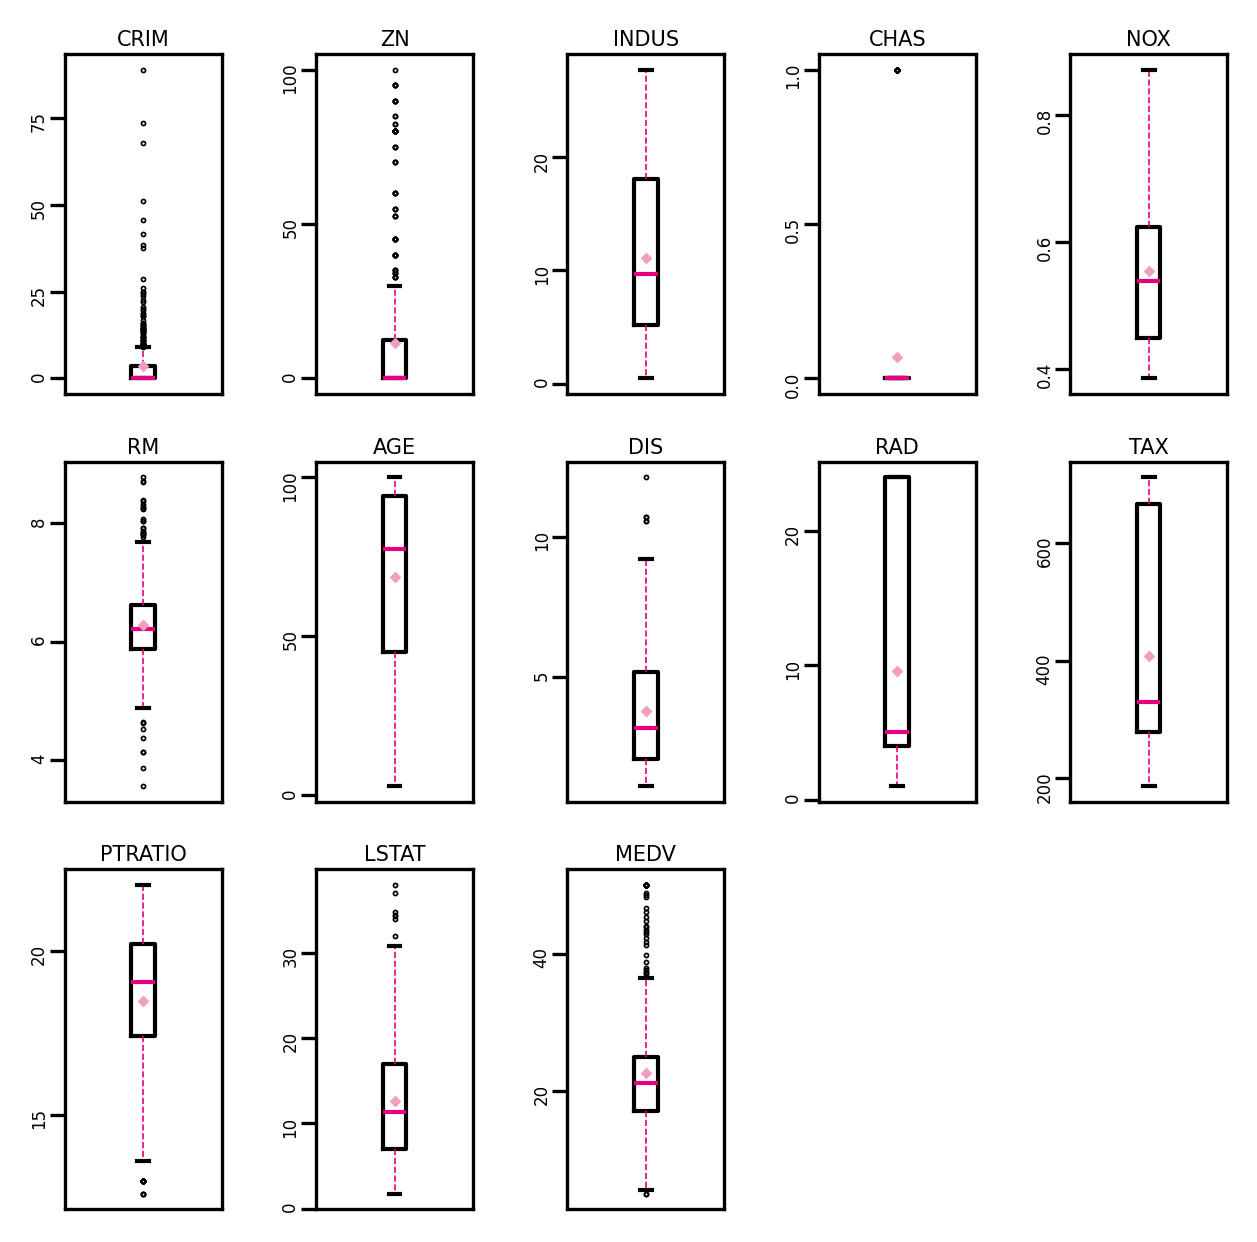

In [ ]:
import matplotlib.pyplot as plt

def boxplot(data, fig_name):
    # 绘制每个属性的箱线图
    data_col = list(data.columns)

    # 创建 5x5 英寸的画布 | dpi=300 表示高分辨率(适合论文或出版)
    plt.figure(figsize=(5, 5), dpi=300) 

    # 子图调整: 增加子图之间的水平间距, 避免标签重叠
    plt.subplots_adjust(wspace=0.6)

    # 循环绘制特征的箱线图
    for i, col_name in enumerate(data_col):
        plt.subplot(3, 5, i+1) # 创建 3 行 5 列 共 15 个子图, 第 i+1 个位置画第 i 个特征
        # 画箱线图
        plt.boxplot(data[col_name], 
                    showmeans=True, # 显示均值, 默认只显示中位数
                    meanprops={"markersize":1,"marker":"D","markeredgecolor":'#f19ec2'}, # 设置均值样式(菱形D, 粉色边框, 很小)
                    medianprops={"color":'#e4007f'}, # 中位数线-玫瑰色
                    whiskerprops={"color":'#e4007f', "linewidth":0.4, 'linestyle':"--"}, # 须线-玫瑰色
                    flierprops={"markersize":0.4}, # 异常点 (离群值) 很小
                    ) 
        # 图名
        plt.title(col_name, fontdict={"size":5}, pad=2)
        # y方向刻度
        plt.yticks(fontsize=4, rotation=90)
        plt.tick_params(pad=0.5)
        # x方向刻度
        plt.xticks([])
    plt.savefig(fig_name)
    plt.show()

boxplot(data, 'ml-vis2.png')

从输出结果看, 数据中存在较多异常值
使用四分位值筛选出箱线图中分布的异常值, 并将这些数据视为噪声, 其将被临界值取代

In [14]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

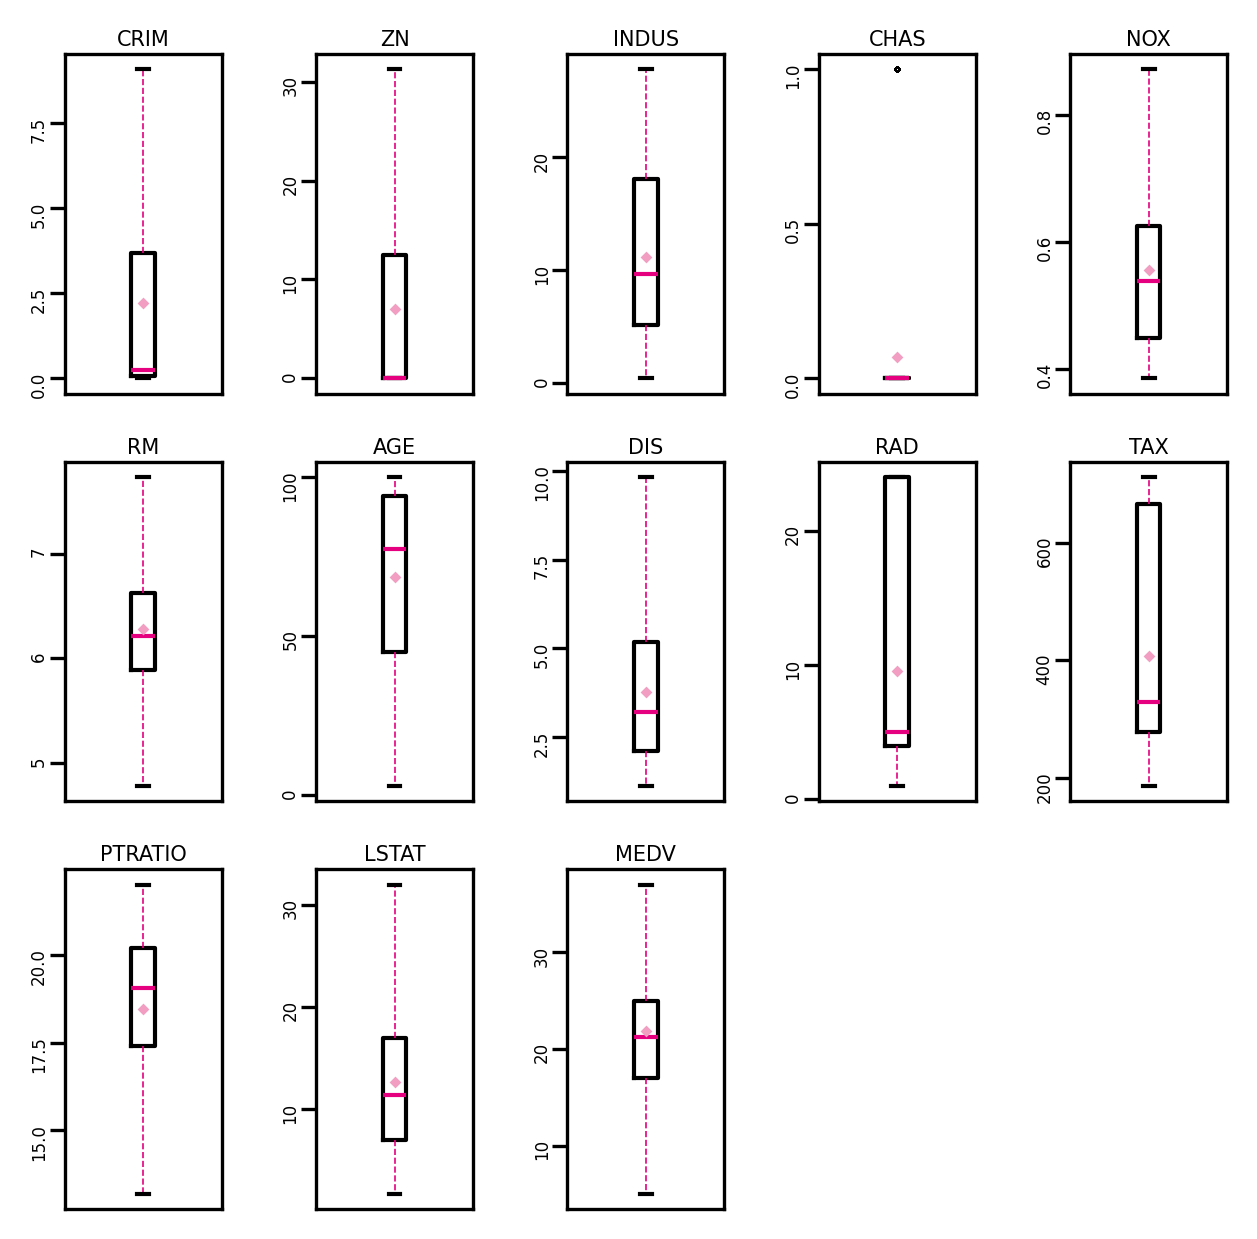

In [15]:
num_features = data.select_dtypes(exclude=['object', 'bool']).columns.tolist()

for feature in num_features:
    if feature == "CHAS":
        continue
    
    Q1 = data[feature].quantile(q=0.25) # 下四分位
    Q3 = data[feature].quantile(q=0.75) # 上四分位

    IQR = Q3-Q1
    top = Q3 + 1.5*IQR # 最大估计值
    bot = Q1 - 1.5*IQR # 最小估计值

    values = data[feature].values
    values[values > top] = top # 临界值取代噪声
    values[values < bot] = bot # 临界值取代噪声
    data[feature] = values.astype(data[feature].dtypes)

boxplot(data, 'ml-vis3.png')

### 数据集划分

In [ ]:
import torch

torch.manual_seed(42)

def train_test_split(X, y, train_percent=0.8):
    n = len(X)
    shuffled_indices = torch.randperm(n) # 返回一个数值在 0 到 n-1, 随机排列的 1-D Tensor
    train_set_size = int(n*train_percent)
    train_indices = shuffled_indices[:train_set_size]
    test_indices = shuffled_indices[train_set_size:]

    X = X.values
    y = y.values

    X_train = X[train_indices]
    y_train = y[train_indices]

    X_test = X[test_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

X = data.drop(['MEDV'], axis=1)
y = data['MEDV']

# pandas 提取出内容, 数据的类型是 numpy.ndarray
X_train, X_test, y_train, y_test = train_test_split(X,y) # X_trainm每一行是个样本, shape[N,D]

### 特征工程

为了消除量纲对数据特征之间影响, 在模型训练前, 需要对特征数据进行归一化处理, 把数据缩放到[0,1]区间内, 使得不同特征之间具有可比性

In [28]:
X_train = torch.as_tensor(X_train, dtype=torch.float32)
X_test = torch.as_tensor(X_test, dtype=torch.float32)
y_train = torch.as_tensor(y_train, dtype=torch.float32)
y_test = torch.as_tensor(y_test, dtype=torch.float32)

X_min = torch.min(X_train, dim=0).values
X_max = torch.max(X_train, dim=0).values

X_train = (X_train-X_min) / (X_max-X_min)
X_test = (X_test-X_min) / (X_max-X_min)

# 训练集构造
train_dataset=(X_train, y_train)
# 测试集构造
test_dataset=(X_test, y_test)

### 模型构建

实例化一个线性回归模型, 特征维度为12

In [29]:
from nndl.op import Linear

# 模型实例化
input_size = 12
model = Linear(input_size)

### 完善Runner类

In [34]:
import torch.nn as nn

mse_loss = nn.MSELoss()

In [36]:
import torch
import os
from nndl.opitimizer import optimizer_lsm

class Runner(object):
    def __init__(self, model, optimizer, loss_fn, metric):
        # 优化器 和 损失函数为 None, 不再关注

        # 模型
        self.model = model
        # 评估指标
        self.metric = metric
        # 优化器
        self.optimizer = optimizer

    def train(self, dataset, reg_lambda, model_dir):
        X, y = dataset
        self.optimizer(self.model, X, y, reg_lambda)

        # 保存模型
        self.save_model(model_dir)

    def evaluate(self, dataset, **kwargs):
        X, y = dataset
        
        y_pred = self.model(X)
        result = self.metric(y_pred, y)

        return result
    
    def predict(self, X, **kwargs):
        return self.model(X)
    
    def save_model(self, model_dir):
        if not os.path.exists(model_dir):
            os.makedirs(model_dir)

        params_saved_path = os.path.join(model_dir, 'params.pdtensor')
        torch.save(model.params, params_saved_path)
    
    def load_model(self, model_dir):
        params_saved_path = os.path.join(model_dir, 'params.pdtensor')
        self.model.params=torch.load(params_saved_path)

optimizer = optimizer_lsm

runner = Runner(model, optimizer=optimizer, loss_fn=None, metric=mse_loss)

In [37]:
saved_dir = 'models'
runner.train(train_dataset, reg_lambda=0, model_dir=saved_dir)

In [38]:
columns_list = data.columns.to_list()
weights = runner.model.params['w'].tolist()
b = runner.model.params['b'].item()

for i in range(len(weights)):
    print(columns_list[i],"weight:",weights[i])

print("b:",b)

CRIM weight: -6.0499186515808105
ZN weight: 1.0032014846801758
INDUS weight: -1.0165683031082153
CHAS weight: 2.0443038940429688
NOX weight: -6.690457344055176
RM weight: 10.15854549407959
AGE weight: -1.3206045627593994
DIS weight: -9.803824424743652
RAD weight: 7.335986137390137
TAX weight: -4.514031887054443
PTRATIO weight: -7.397049427032471
LSTAT weight: -11.4552640914917
b: 32.114105224609375


### 模型测试

In [39]:
runner.load_model(saved_dir)

mse = runner.evaluate(test_dataset)
print('MSE:', mse.item())

MSE: 14.879375457763672


### 模型预测

使用 Runner 中 load_model 函数加载保存好的模型, 使用 predict 进行模型预测

In [56]:
runner.load_model(saved_dir)
pred = runner.predict(X_test[1:2])
print("真实房价：",y_test[1:2].item())
print("预测的房价：",pred.item())

真实房价： 18.600000381469727
预测的房价： 18.906761169433594


In [46]:
X_test.shape

torch.Size([102, 12])

In [ ]:
X_test[1:2].shape # 是 2D 向量

torch.Size([1, 12])

In [ ]:
X_test[1].shape # 是 1D 向量

torch.Size([12])